## Exploratory Data Analysis

Since we are trying to find the attirbutes that are most related to popularity to be used in our models later, we will be doing the exploratory data analysis in the following ways:

1. Explore the distribution of Popularity in the dataset + Univariate Analysis
2. Explore the distribution of each of each of the attirbutes + Univariate Analysis
3. Explore the relationship between popularity and each attirbute (Bivariate analysis)
    This will be done through the help of regression and classification

Exploring the distribution of the target variable (popularity) and the other variables through univariate analysis can help identify any patterns, trends, or outliers in the data. It can also provide insight into the range and distribution of the variables, which can help with selecting appropriate analysis methods later on.

Bivariate analysis, which explores the relationship between popularity and each attribute, is also important as it can reveal potential correlations or patterns that will be useful for modeling and further analysis.

In [5]:
import pandas as pd

# Load the dataset into a pandas dataframe
df = pd.read_csv('../Data/tracks_reduced.csv')

# Select a random sample of 20% of the data
df = df.sample(frac=0.2, random_state=42)
df.describe()


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,93867.000000,9.386700e+04,93867.000000,93867.000000,93867.000000,93867.000000,93867.000000,93867.000000,93867.000000,93867.000000,93867.000000,93867.000000,93867.000000,93867.000000,93867.000000
mean,27.646894,2.305861e+05,0.043753,0.564068,0.542672,5.228334,-10.205072,0.660157,0.104857,0.449668,0.113065,0.213817,0.552959,118.468821,3.875142
std,18.396825,1.323319e+05,0.204547,0.166369,0.252068,3.518268,5.106201,0.473658,0.180264,0.347984,0.266355,0.183949,0.257441,29.761418,0.472235
min,0.000000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750530e+05,0.000000,0.453000,0.345000,2.000000,-12.893500,0.000000,0.034000,0.099100,0.000000,0.098500,0.347000,95.608500,4.000000
50%,27.000000,2.147870e+05,0.000000,0.578000,0.550000,5.000000,-9.215000,1.000000,0.044300,0.421000,0.000023,0.139000,0.565000,117.471000,4.000000
75%,41.000000,2.640865e+05,0.000000,0.686000,0.749000,8.000000,-6.478000,1.000000,0.076100,0.783000,0.009845,0.277000,0.769000,136.179500,4.000000
max,97.000000,5.403500e+06,1.000000,0.988000,1.000000,11.000000,5.109000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,243.507000,5.000000


In the code above, describe() is used to provide a summary of the reduced dataset after sampling, to gain an understanding of the range and distribution of the data for each attribute.

## Analysis of Popularity

Popularity Statistics:

mean      27.575255
median    27.000000
25%       13.000000
75%       41.000000
std       18.367527
Name: popularity, dtype: float64


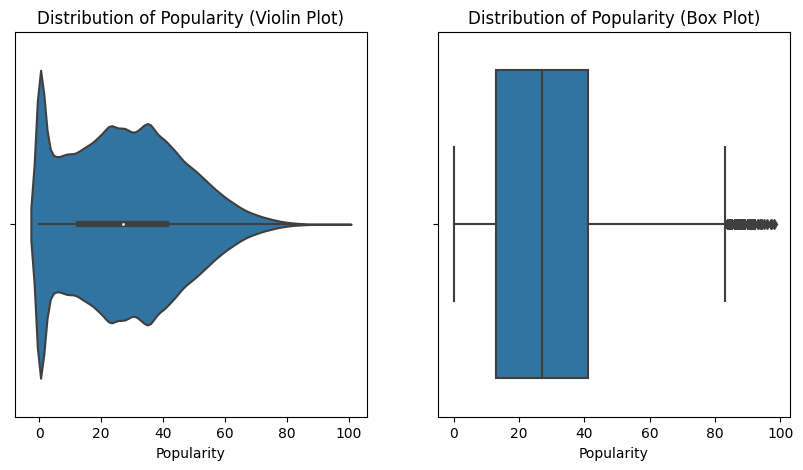

In [7]:
#First let us examine the distribution of popularity in the dataset
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../Data/tracks_reduced.csv')
# Calculate the mean, median, quartiles, and variance of popularity
popularity_stats = df['popularity'].describe()[['mean', '50%', '25%', '75%', 'std']]
popularity_stats.rename(index={'50%': 'median'}, inplace=True)

print('Popularity Statistics:\n')
print(popularity_stats)

# Create a violin plot and box plot of popularity
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.violinplot(x=df['popularity'], ax=axes[0])
axes[0].set_title('Distribution of Popularity (Violin Plot)')
axes[0].set_xlabel('Popularity')

sns.boxplot(x=df['popularity'], ax=axes[1])
axes[1].set_title('Distribution of Popularity (Box Plot)')
axes[1].set_xlabel('Popularity')

plt.show()

Based on this we cann see that on average a song's popularity is around 27.6 and there is a high variance of 18.3. On the box plot, we can see a considerable number on outliers, especially in the popular region. Moving forward, we will try to account for factors that contribute to such outliers.

## Duration and Popularity

Duration Statistics:

mean      229981 ms
median    214893 ms
25%       175053 ms
75%       263800 ms
std       127085 ms
Name: duration_ms, dtype: object


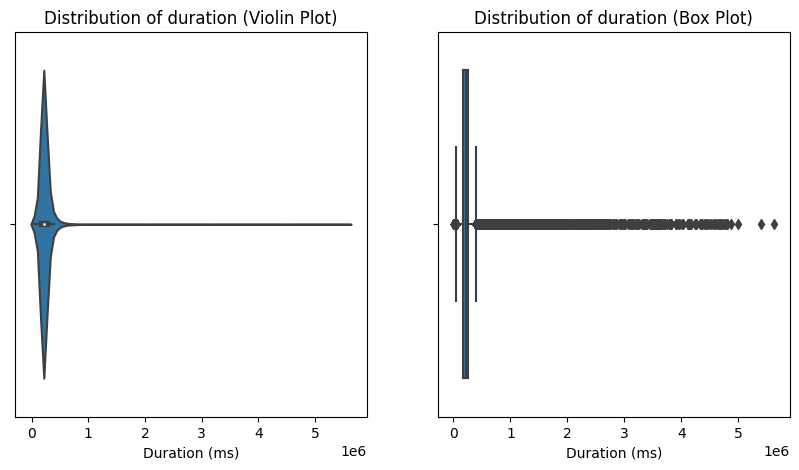

In [11]:
df = pd.read_csv('../Data/tracks_reduced.csv')

# Calculate the mean, median, quartiles, and variance of duration
duration_stats = df['duration_ms'].describe()[['mean', '50%', '25%', '75%', 'std']]
duration_stats.rename(index={'50%': 'median'}, inplace=True)
duration_stats = duration_stats.astype(int).astype(str) + ' ms'

print('Duration Statistics:\n')
print(duration_stats)

# Create a violin plot and box plot of duration
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.violinplot(x=df['duration_ms'], ax=axes[0])
axes[0].set_title('Distribution of duration (Violin Plot)')
axes[0].set_xlabel('Duration (ms)')

sns.boxplot(x=df['duration_ms'], ax=axes[1])
axes[1].set_title('Distribution of duration (Box Plot)')
axes[1].set_xlabel('Duration (ms)')

plt.show()

Based on this distirbution, we can see a high number of anomolies on one side as well. Next, let us see if this accounts for popularity in any case

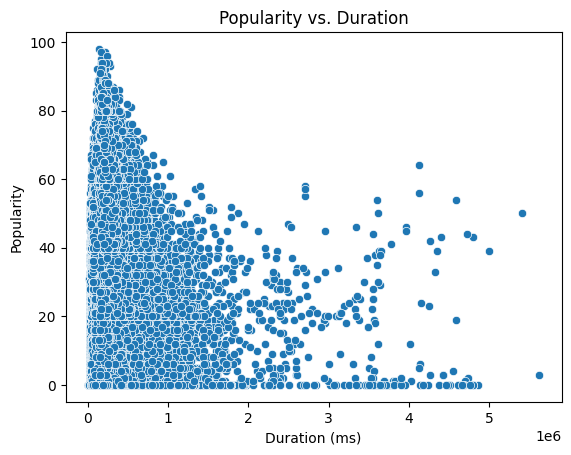

Correlation coefficient: 0.027561615111397215


In [12]:
#Next, let us see if there is a direct relationship between duration and popularity through a scatter plot

# Create a scatter plot of duration_ms vs. popularity
sns.scatterplot(x='duration_ms', y='popularity', data=df)

# Set the plot title and axis labels
plt.title('Popularity vs. Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')

# Show the plot
plt.show()


# Calculate the correlation coefficient between duration_ms and popularity
corr = df['duration_ms'].corr(df['popularity'])

# Print the correlation coefficient to the console
print('Correlation coefficient:', corr)

## Based on this, we see that the correlation coefficient is extremely low and popularity does not seem to be related to duration at all. However, we notice that songs with popularity over 60 always have a relatively low duration. Let us now account for this using a new analysis method - Clustering

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Duration Range by Cluster (in ms):
                min         max
cluster                        
0           3344 ms   207562 ms
1         343187 ms   751960 ms
2         752200 ms  2135472 ms
3        2141995 ms  5621218 ms
4         207565 ms   343173 ms


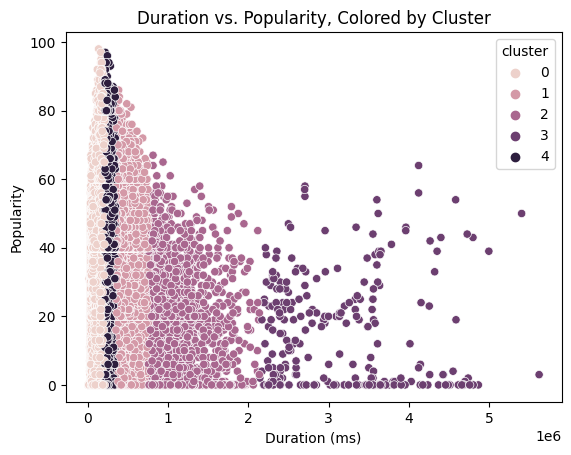

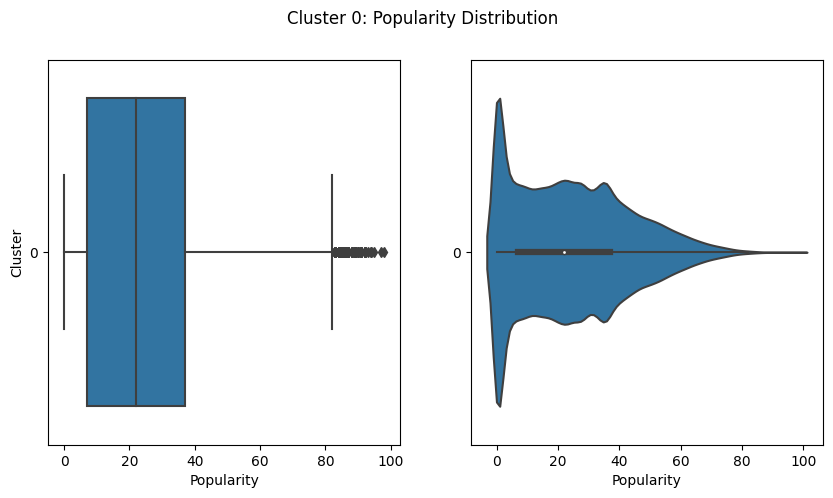

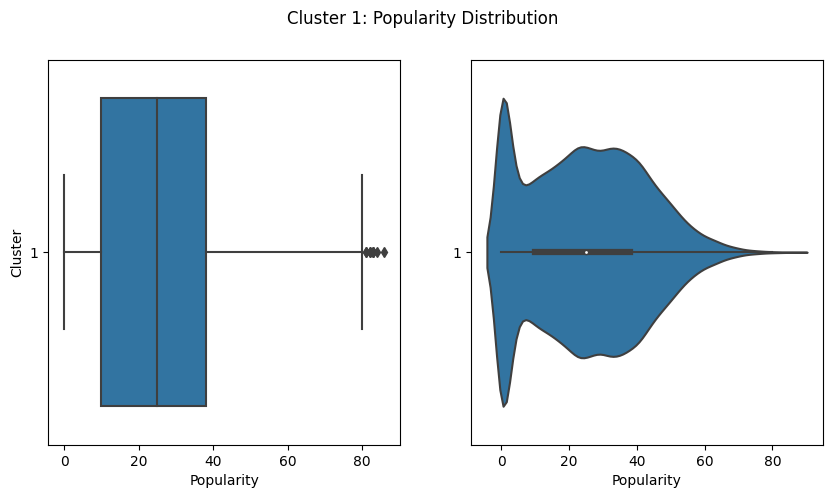

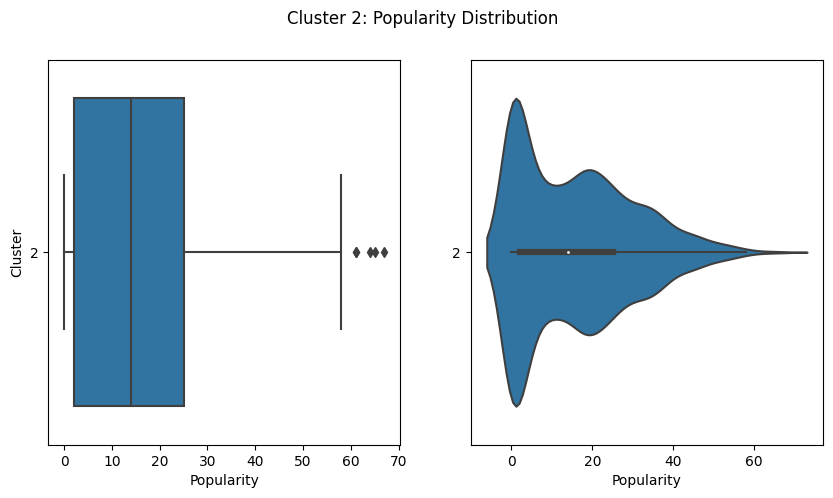

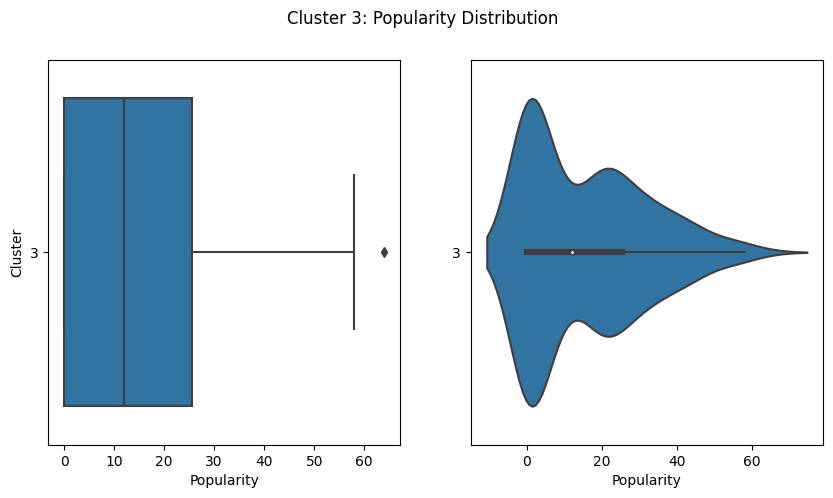

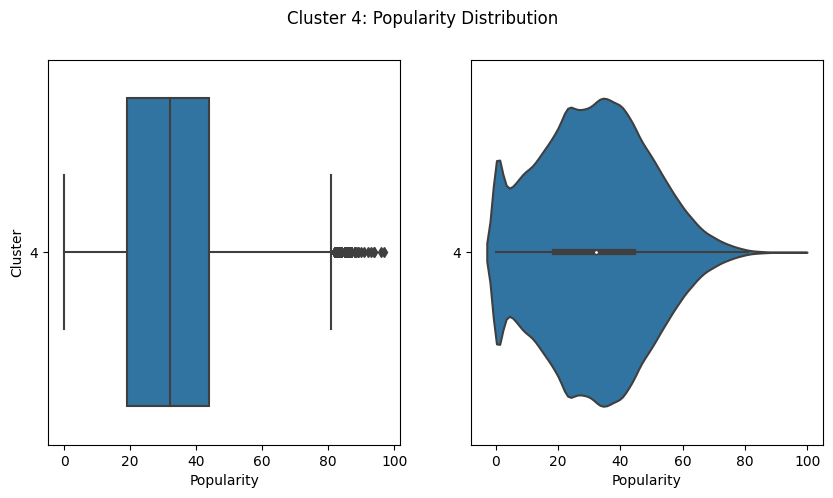

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('../Data/tracks_reduced.csv')
# Extract the duration and popularity features
X = df[['duration_ms', 'popularity']]

# Perform k-means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

# Add the cluster labels to the dataframe
df['cluster'] = labels

# Group the DataFrame by cluster labels and calculate the duration range for each cluster
cluster_duration_range = df.groupby('cluster')['duration_ms'].agg(['min', 'max'])

# Add the unit "ms" to the duration range values
cluster_duration_range['min'] = cluster_duration_range['min'].apply(lambda x: str(x) + ' ms')
cluster_duration_range['max'] = cluster_duration_range['max'].apply(lambda x: str(x) + ' ms')

# Print the duration range for each cluster
print("Duration Range by Cluster (in ms):")
print(cluster_duration_range)

# Create a scatterplot of duration vs. popularity, colored by cluster
sns.scatterplot(data=df, x='duration_ms', y='popularity', hue='cluster')
plt.title('Duration vs. Popularity, Colored by Cluster')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

# Create boxplots and violin plots of popularity for each cluster
for i in range(5):
    cluster_data = df.loc[df['cluster'] == i]
    fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
    sns.boxplot(x='popularity', y='cluster', data=cluster_data, orient='horizontal', ax=axes[0])
    sns.violinplot(x='popularity', y='cluster', data=cluster_data, orient='horizontal', ax=axes[1])
    fig.suptitle(f"Cluster {i}: Popularity Distribution")
    axes[0].set_xlabel('Popularity')
    axes[1].set_xlabel('Popularity')
    axes[0].set_ylabel('Cluster')
    axes[1].set_ylabel('')
    plt.show()


Here, we see a significant difference in each of these cluseters which has to be proven to prove our hypothesis that one cluster is better than another when it comes to popularity. As our data is not normally distirbuted, we will use the Kruskal-Wallis test to determine if a cluster is better than the other. If the p-value of the Kruskal-Wallis test is less than the chosen significance level (e.g. 0.05), we can reject the null hypothesis and conclude that at least one of the groups has a different median than the others.

In [14]:
from scipy.stats import kruskal

# Calculate the median popularity for each cluster
cluster_medians = df.groupby('cluster')['popularity'].median()

# Perform Kruskal-Wallis test
stat, pval = kruskal(*[cluster_data['popularity'].values for _, cluster_data in df.groupby('cluster')])

# Print the median popularity for each cluster
print("Median Popularity by Cluster:")
print(cluster_medians)

# Print the Kruskal-Wallis test results
print("Kruskal-Wallis Test Results:")
print("Test statistic:", stat)
print("p-value:", pval)

Median Popularity by Cluster:
cluster
0    22.0
1    25.0
2    14.0
3    12.0
4    32.0
Name: popularity, dtype: float64
Kruskal-Wallis Test Results:
Test statistic: 21665.485333381388
p-value: 0.0


A p value of 0.0 suggest a strong evidence against the null hypothesis, and suggests that a cluster does indeed have better popularity than another. As such, we can conclude that clusters do affect popularity. Based on the test, we see that cluster 4 has the highest median with a significant difference. As such, we can safely suggest aspiring top aritists to have songs with duration in cluster 4. Cluster 4 = 207.6 seconds - 343.2 seconds 

## Explicit and Popularity (1 and 0)

In [18]:
data = pd.read_csv('../Data/tracks_reduced.csv')
subset = data[['explicit', 'popularity']]


In [23]:
import matplotlib.pyplot as plt

explicit = df[df['explicit'] == 1]['popularity']
non_explicit = df[df['explicit'] == 0]['popularity']

print(f"Number of data points in Explicit group: {len(explicit)}")
print(f"Number of data points in Non-Explicit group: {len(non_explicit)}")



Number of data points in Explicit group: 20721
Number of data points in Non-Explicit group: 448615


As the number of data points for explicit is significantly lesser, we will balance the sample sizes by randomly sampling the non-explicit songs group to match the number of data points in the explicit songs group.

In [24]:
non_explicit_sample = non_explicit.sample(n=20721, random_state=42)
print(f"Number of data points in Explicit group: {len(explicit)}")
print(f"Number of data points in Non-Explicit group: {len(non_explicit_sample)}")

Number of data points in Explicit group: 20721
Number of data points in Non-Explicit group: 20721


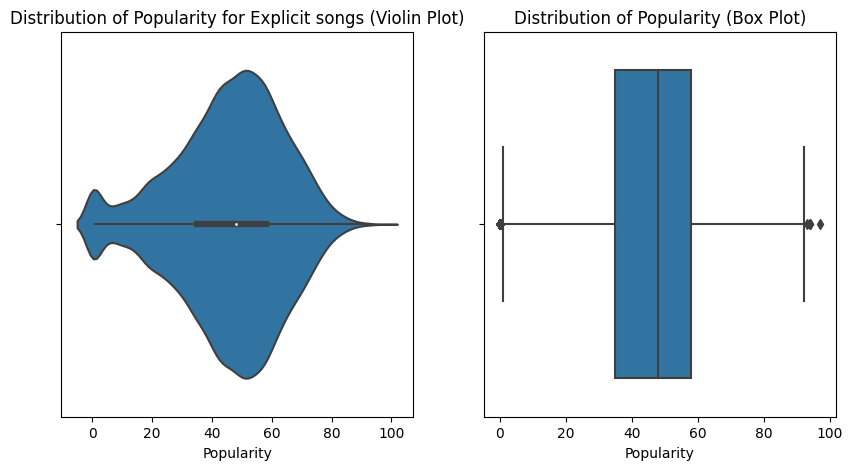

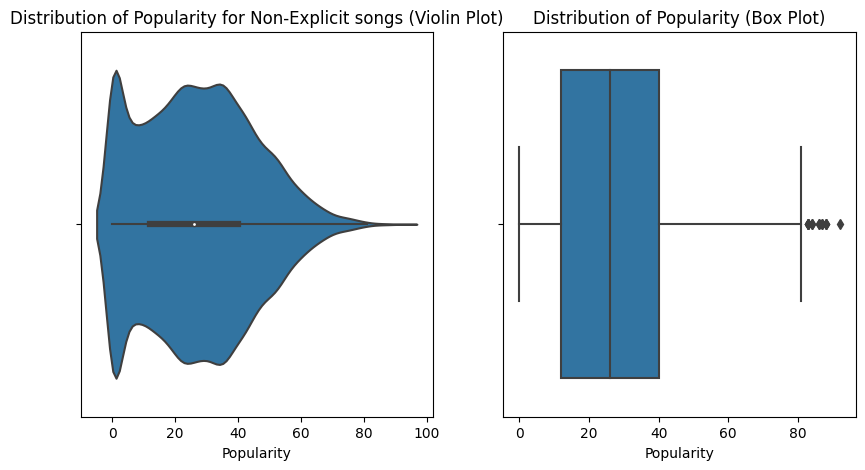

Popularity Statistics (Explicit):

mean      45.673713
median    48.000000
25%       35.000000
75%       58.000000
std       18.248543
Name: popularity, dtype: float64
Popularity Statistics (Non-Explicit):

mean      26.878288
median    26.000000
25%       12.000000
75%       40.000000
std       17.999650
Name: popularity, dtype: float64


In [25]:
# Create a violin plot and box plot of popularity
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.violinplot(x=explicit, ax=axes[0])
axes[0].set_title('Distribution of Popularity for Explicit songs (Violin Plot)')
axes[0].set_xlabel('Popularity')

sns.boxplot(x=explicit, ax=axes[1])
axes[1].set_title('Distribution of Popularity (Box Plot)')
axes[1].set_xlabel('Popularity')


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.violinplot(x=non_explicit_sample, ax=axes[0])
axes[0].set_title('Distribution of Popularity for Non-Explicit songs (Violin Plot)')
axes[0].set_xlabel('Popularity')

sns.boxplot(x=non_explicit_sample, ax=axes[1])
axes[1].set_title('Distribution of Popularity (Box Plot)')
axes[1].set_xlabel('Popularity')


plt.show()

# Calculate the mean, median, quartiles, and variance of popularity
popularity_stats = explicit.describe()[['mean', '50%', '25%', '75%', 'std']]
popularity_stats.rename(index={'50%': 'median'}, inplace=True)

print('Popularity Statistics (Explicit):\n')
print(popularity_stats)



# Calculate the mean, median, quartiles, and variance of popularity
popularity_stats = non_explicit_sample.describe()[['mean', '50%', '25%', '75%', 'std']]
popularity_stats.rename(index={'50%': 'median'}, inplace=True)

print('Popularity Statistics (Non-Explicit):\n')
print(popularity_stats)

Looking at above, we can hypothesize that explicit songs tend to do better thanks to their high mean and median. Next, we will perform a statistical test to compare the two groups. We will be using a two-sample t-test, which can determine if the difference in means between two groups is statistically significant.

In [27]:
import scipy.stats as stats

# Conduct two-sample t-test
t, p = stats.ttest_ind(explicit, non_explicit_sample)

# Print t-test results
print('Two-Sample t-Test Results:')
print(f"t = {t:.3f}")
print(f"p = {p:.2f}")

# Determine if difference in means is significant
if p < 0.05:
    print("The difference in means is statistically significant.")
else:
    print("The difference in means is not statistically significant.")


Two-Sample t-Test Results:
t = 105.554
p = 0.00
The difference in means is statistically significant.


A very small p-value indicates that the difference in means is even less likely to be due to chance and provides strong evidence for the alternative hypothesis that there is a true difference between the two groups. It's important to note that while a significant result would suggest that explicit songs tend to have higher popularity than non-explicit songs, it does not necessarily prove causation. There may still be other confounding factors that are influencing the difference in means. Overall it is safe to conclude that on average, explicit songs have higher popularity than non-explicit songs

## Number of Artists and Popularity

Since the CSV only has a column called Artists which is an array of strings, firstly we will have to extract number of artists instead using pandas

In [36]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('../Data/tracks_reduced.csv')

# Extract the number of artists from the "artists" column and create a new column called num_artists
df['num_artists'] = df['artists'].str.count(',') + 1


Correlation coefficient: -0.072


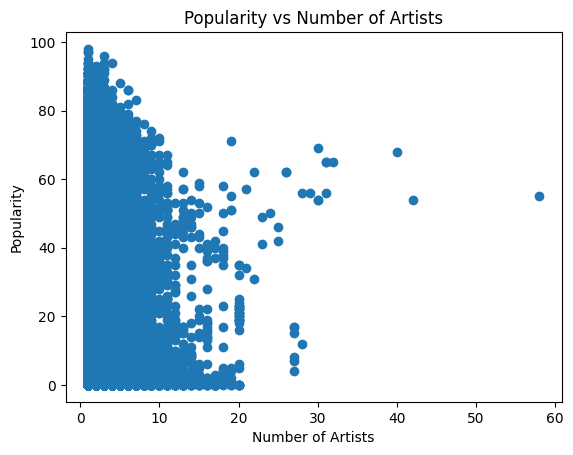

In [37]:
import matplotlib.pyplot as plt

# Create a scatter plot of popularity against number of artists
plt.scatter(df['num_artists'], df['popularity'])

# Add labels and title to the plot
plt.xlabel('Number of Artists')
plt.ylabel('Popularity')
plt.title('Popularity vs Number of Artists')

# Calculate the correlation coefficient
corr_coef = df['num_artists'].corr(df['popularity'])

# Print the correlation coefficient
print(f"Correlation coefficient: {corr_coef:.3f}")

# Show the plot
plt.show()

A correlation coefficient of -0.072 indicates a weak negative correlation between the two variables, popularity and the number of artists. This means that as the number of artists in a song increases, the popularity of the song tends to slightly decrease, but the relationship very weak.

However, majority of the songs in our dataset have only one artist, it could potentially affect the results in our above analysis. This is because the range of the number of artists is limited, and the majority of the data falls within a narrow range. As a result, the relationship between the number of artists and popularity may not be fully captured.

To address this issue, we group the songs into categories based on the number of artists and analyze the relationship between popularity and the number of artists within each category. This would provide a more detailed view of how the number of artists affects popularity, and help to avoid bias towards songs with only one artist.

num_artists_bins             
(0, 2]            num_artists   -0.036319
(2, 5]            num_artists   -0.015942
(5, 10]           num_artists   -0.061152
(10, 20]          num_artists   -0.101494
(20, 50]          num_artists    0.285797
Name: popularity, dtype: float64


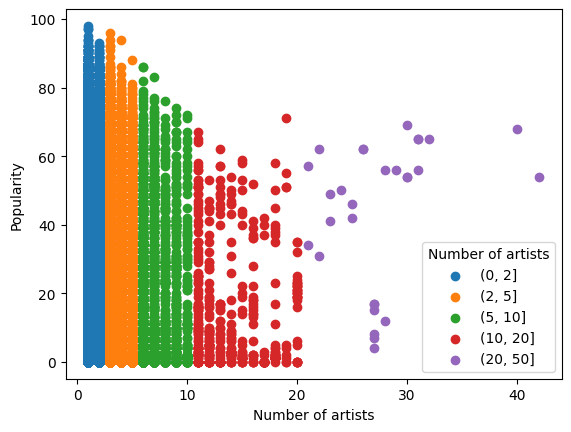

In [40]:
bins = [0, 2, 5, 10, 20, 50]
df['num_artists_bins'] = pd.cut(df['num_artists'], bins=bins)

grouped = df.groupby('num_artists_bins')
corr_df = grouped[['num_artists', 'popularity']].corr().iloc[0::2,-1]
print(corr_df)
for name, group in grouped:
    plt.scatter(group['num_artists'], group['popularity'], label=name)

plt.legend(title='Number of artists')
plt.xlabel('Number of artists')
plt.ylabel('Popularity')
plt.show()


None of the groups except for the 20-50 group have a non-weak correlation coefficient. The higher coefficient for the 20-50 group can be explained by the presence of only a few data points. As such, we can conclude that number of artists has a weak relationship as a whole with popularity.

## Release Year/Month and Popularity

Given that in the CSV somes dates are in the form of exact dates and some are in the form of exact years, we will first clean the data and only show it in the form of year.

In [41]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('../Data/tracks_reduced.csv')

# Extract the year from the "date" column and create a new column
df['year'] = df['release_date'].str.extract('(\d{4})', expand=False)


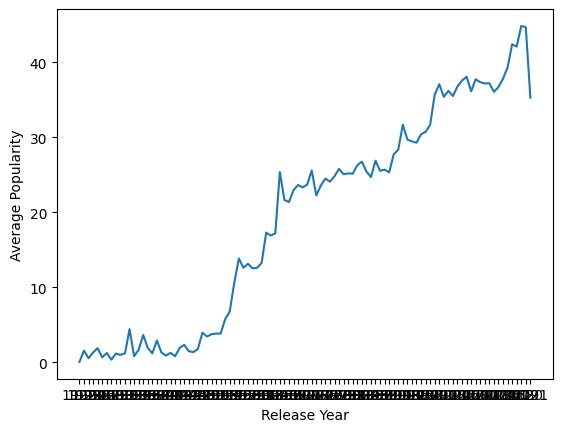

In [42]:

# Group the songs by release year and calculate the average popularity for each year
popularity_by_year = df.groupby('year')['popularity'].mean()

# Plot a line chart to visualize the relationship between release year and popularity
plt.plot(popularity_by_year.index, popularity_by_year.values)
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.show()


An increasing line chart suggests that there is a positive trend between the variables being plotted. In the case of popularity vs. release year, an increasing line chart would suggest that as the years go on, on average, songs are becoming more popular. However, it's important to note that correlation does not necessarily imply causation and there are other factors in play. In this case, since the data is from Spotify songs released later are expected to do better when it comes to popularity on spotify. This is due to factors such as artists advertising their newly-released songs, music events covering mainly new songs etc.

Next, let us explore how release month affects popularity. Since there are songs present withouth their exact months and dates, these songs will be omitted from the analysis below

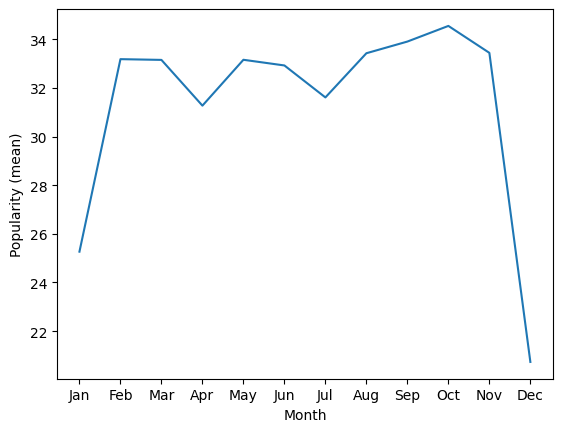

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('../Data/tracks_reduced.csv')

# Filter the DataFrame to only include rows with a month in the date
df = df[df['release_date'].str.len() > 4]

# Extract the month from the date column and create a new column
df['month'] = pd.to_datetime(df['release_date']).dt.month

# Group the DataFrame by month and calculate the mean popularity for each group
grouped = df.groupby('month')['popularity'].mean().reset_index()

# Map month numbers to month names
grouped['month'] = grouped['month'].apply(lambda x: calendar.month_abbr[x])

# Plot the popularity vs. month as a line graph
plt.plot(grouped['month'], grouped['popularity'])
plt.xlabel('Month')
plt.ylabel('Popularity (mean)')
plt.show()



Based on the above line-graph, a sharp difference in seen in Dec, Jan and the rest of the months. The rest of the months have a similar mean popularity in the rangge 31-34. Possible reasons for low popularity for songs released in Dec and Jan could be:

1. Competition: December and January are often considered the holiday season, where people may be more focused on festivities and spending time with loved ones rather than discovering new music. As a result, there may be more competition among new releases during these months, leading to a lower average popularity for all songs.
2. Release strategy: Some artists may strategically avoid releasing new music during December and January due to the holiday season's increased competition. As a result, the songs that are released during these months may be of lower quality or less well-known, leading to a lower average popularity for all songs.
3. Cultural factors: December and January may have different cultural and societal expectations and preferences for music. For example, December may be associated with Christmas music, which may not be as popular with some audiences, leading to a lower average popularity for all songs. Similarly, January may be associated with new beginnings and fresh starts, leading to different musical preferences than other months.

## Danceability and Popularity

Danceability Statistics:

mean      0.56
median    0.58
25%       0.45
75%       0.69
std       0.17
Name: danceability, dtype: object


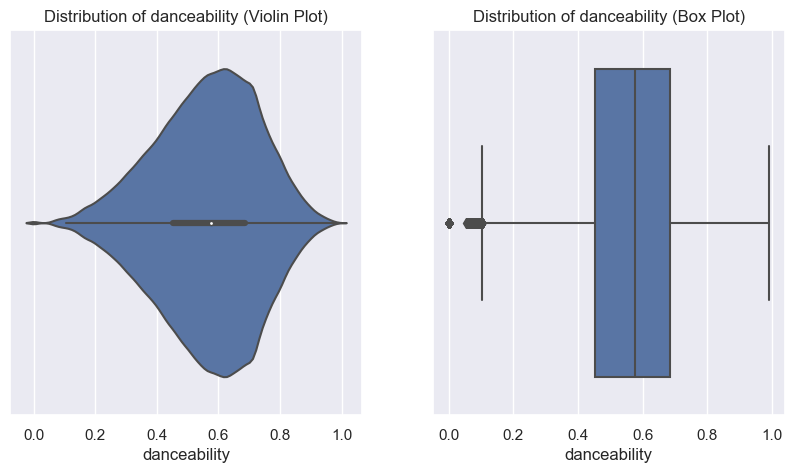

In [59]:
df = pd.read_csv('../Data/tracks_reduced.csv')

# Calculate the mean, median, quartiles, and variance of danceability
danceability_stats = df['danceability'].describe()[['mean', '50%', '25%', '75%', 'std']]
danceability_stats.rename(index={'50%': 'median'}, inplace=True)

# Convert the statistics to string with 2 decimal places
danceability_stats = danceability_stats.apply(lambda x: f'{x:.2f}')

print('Danceability Statistics:\n')
print(danceability_stats)


# Create a violin plot and box plot of duration
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.violinplot(x=df['danceability'], ax=axes[0])
axes[0].set_title('Distribution of danceability (Violin Plot)')
axes[0].set_xlabel('danceability')

sns.boxplot(x=df['danceability'], ax=axes[1])
axes[1].set_title('Distribution of danceability (Box Plot)')
axes[1].set_xlabel('danceability')

plt.show()

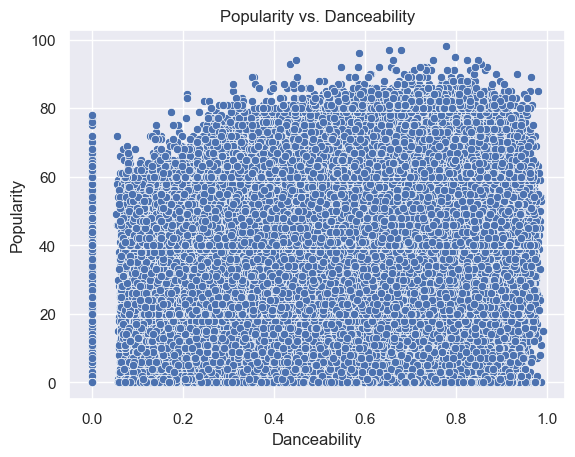

Correlation coefficient: 0.18797590985897308


In [60]:
#Next, let us see if there is a direct relationship between danceability and popularity through a scatter plot

# Create a scatter plot ofdanceability vs. popularity
sns.scatterplot(x='danceability', y='popularity', data=df)

# Set the plot title and axis labels
plt.title('Popularity vs. Danceability')
plt.xlabel('Danceability')
plt.ylabel('Popularity')

# Show the plot
plt.show()


# Calculate the correlation coefficient between danceability and popularity
corr = df['danceability'].corr(df['popularity'])

# Print the correlation coefficient to the console
print('Correlation coefficient:', corr)

A low correlation coefficient of 0.188 indicates a weak positive relationship between the two variables. This means that there may be some influence of danceability on the popularity of a song, but it is not a strong factor.

## Energy and Popularity

Energy Statistics:

mean      0.542
median    0.550
25%       0.344
75%       0.749
std       0.252
Name: energy, dtype: object


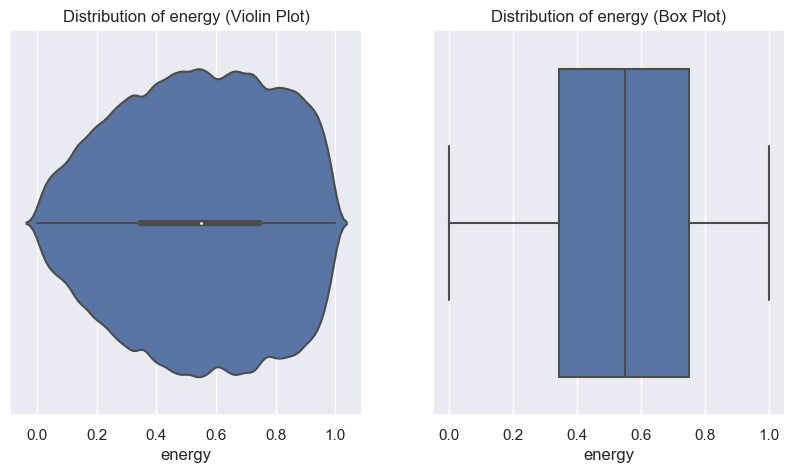

In [61]:
df = pd.read_csv('../Data/tracks_reduced.csv')

# Calculate the mean, median, quartiles, and variance of energy
energy_stats = df['energy'].describe()[['mean', '50%', '25%', '75%', 'std']]
energy_stats.rename(index={'50%': 'median'}, inplace=True)

# Convert the statistics to string with 3 decimal places
energy_stats = energy_stats.apply(lambda x: f'{x:.3f}')

print('Energy Statistics:\n')
print(energy_stats)


# Create a violin plot and box plot of energy
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.violinplot(x=df['energy'], ax=axes[0])
axes[0].set_title('Distribution of energy (Violin Plot)')
axes[0].set_xlabel('energy')

sns.boxplot(x=df['energy'], ax=axes[1])
axes[1].set_title('Distribution of energy (Box Plot)')
axes[1].set_xlabel('energy')

plt.show()

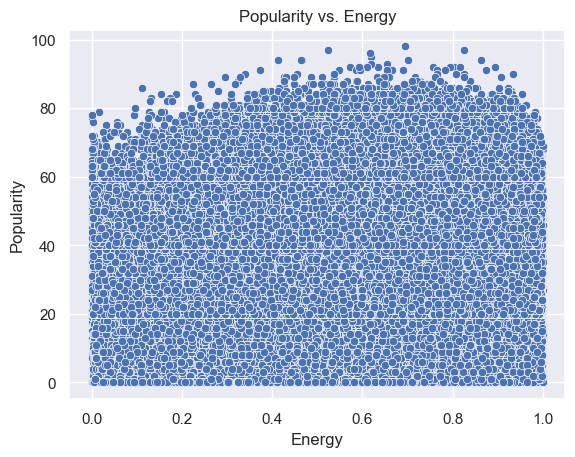

Correlation coefficient: 0.30244830109063964


In [62]:
#Next, let us see if there is a direct relationship between energy and popularity through a scatter plot

# Create a scatter plot of energy vs. popularity
sns.scatterplot(x='energy', y='popularity', data=df)

# Set the plot title and axis labels
plt.title('Popularity vs. Energy')
plt.xlabel('Energy')
plt.ylabel('Popularity')

# Show the plot
plt.show()


# Calculate the correlation coefficient between energy and popularity
corr = df['energy'].corr(df['popularity'])

# Print the correlation coefficient to the console
print('Correlation coefficient:', corr)

A correlation coefficient of 0.30 between popularity and energy suggests a positive correlation between the two variables. This means that there is a tendency for songs with higher energy to have slightly higher popularity on average, but the relationship is not strong.

## Key and Popularity

Key Statistics:

mean      5.22
median    5.00
25%       2.00
75%       8.00
std       3.52
Name: key, dtype: object


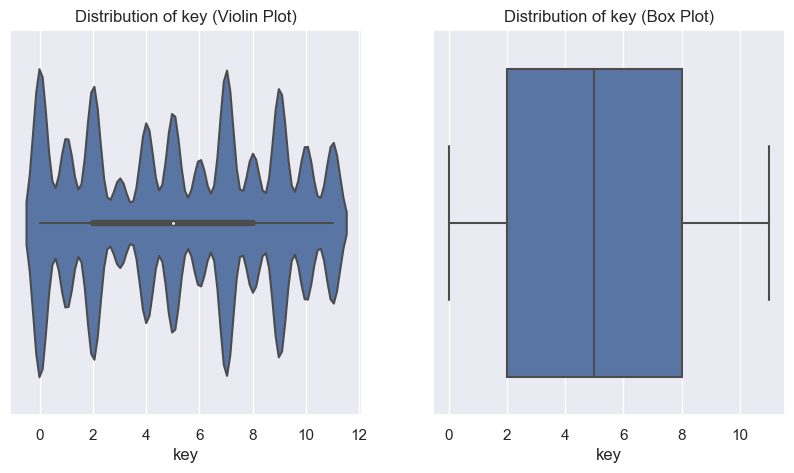

In [63]:
df = pd.read_csv('../Data/tracks_reduced.csv')

# Calculate the mean, median, quartiles, and variance of key
key_stats = df['key'].describe()[['mean', '50%', '25%', '75%', 'std']]
key_stats.rename(index={'50%': 'median'}, inplace=True)

# Convert the statistics to string with 2 decimal places
key_stats = key_stats.apply(lambda x: f'{x:.2f}')

print('Key Statistics:\n')
print(key_stats)


# Create a violin plot and box plot of key
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.violinplot(x=df['key'], ax=axes[0])
axes[0].set_title('Distribution of key (Violin Plot)')
axes[0].set_xlabel('key')

sns.boxplot(x=df['key'], ax=axes[1])
axes[1].set_title('Distribution of key (Box Plot)')
axes[1].set_xlabel('key')

plt.show()

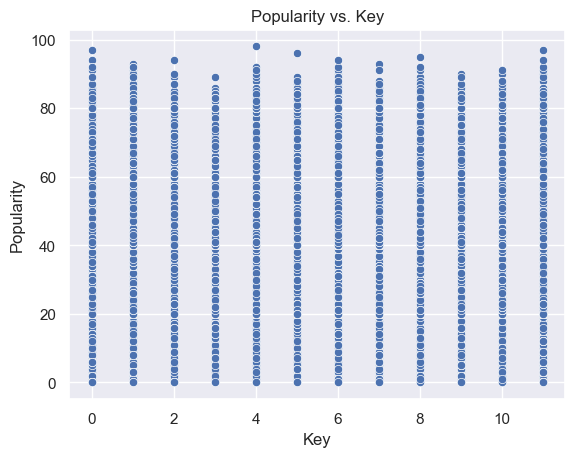

Correlation coefficient: 0.015276910145031356


In [64]:
#Next, let us see if there is a direct relationship between key and popularity through a scatter plot

# Create a scatter plot of key vs. popularity
sns.scatterplot(x='key', y='popularity', data=df)

# Set the plot title and axis labels
plt.title('Popularity vs. Key')
plt.xlabel('Key')
plt.ylabel('Popularity')

# Show the plot
plt.show()


# Calculate the correlation coefficient between energy and popularity
corr = df['key'].corr(df['popularity'])

# Print the correlation coefficient to the console
print('Correlation coefficient:', corr)

The above graph does not suggest much about the relationship between key and popularity. Let us next find the mean popularity for each key and see if there is a relationship based on that

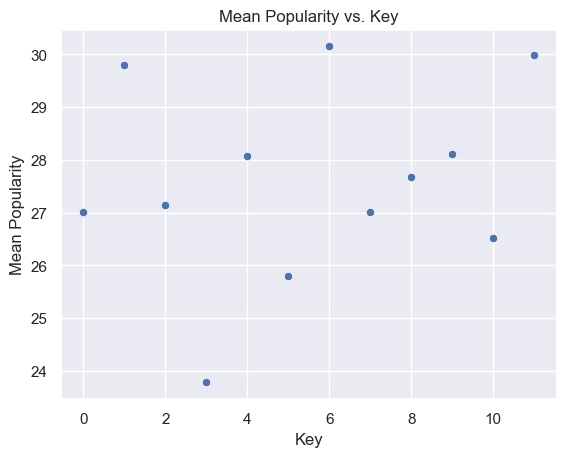

Correlation coefficient: 0.015276910145031356


In [65]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('../Data/tracks_reduced.csv')

# Group the DataFrame by key and calculate the mean popularity for each group
grouped = df.groupby('key')['popularity'].mean().reset_index()

# Create a scatter plot of key vs. mean popularity
sns.scatterplot(x='key', y='popularity', data=grouped)

# Set the plot title and axis labels
plt.title('Mean Popularity vs. Key')
plt.xlabel('Key')
plt.ylabel('Mean Popularity')

# Show the plot
plt.show()

# Calculate the correlation coefficient between key and popularity
corr = df['key'].corr(df['popularity'])

# Print the correlation coefficient to the console
print('Correlation coefficient:', corr)

As such, based on both the graphs above and the correlation value of 0.015, we can conclude that there is a very small or negligible relationship between the variables, and any association observed between them is most likely due to chance. Key thus plays a negligible part in determining popularity.

## Loudness and Popularity



Loudness Statistics:

mean      5.22
median    5.00
25%       2.00
75%       8.00
std       3.52
Name: key, dtype: object


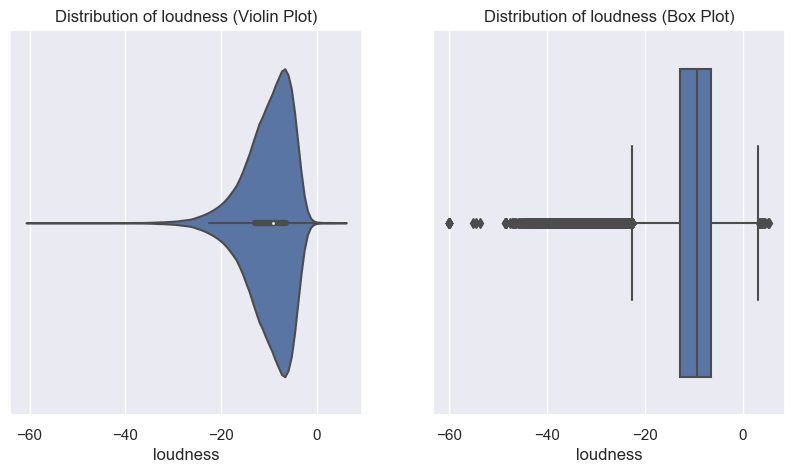

In [66]:
df = pd.read_csv('../Data/tracks_reduced.csv')

# Calculate the mean, median, quartiles, and variance of loudness
loudness_stats = df['key'].describe()[['mean', '50%', '25%', '75%', 'std']]
loudness_stats.rename(index={'50%': 'median'}, inplace=True)

# Convert the statistics to string with 2 decimal places
loudness_stats = loudness_stats.apply(lambda x: f'{x:.2f}')

print('Loudness Statistics:\n')
print(loudness_stats)

# Create a violin plot and box plot of loudness
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.violinplot(x=df['loudness'], ax=axes[0])
axes[0].set_title('Distribution of loudness (Violin Plot)')
axes[0].set_xlabel('loudness')

sns.boxplot(x=df['loudness'], ax=axes[1])
axes[1].set_title('Distribution of loudness (Box Plot)')
axes[1].set_xlabel('loudness')

plt.show()

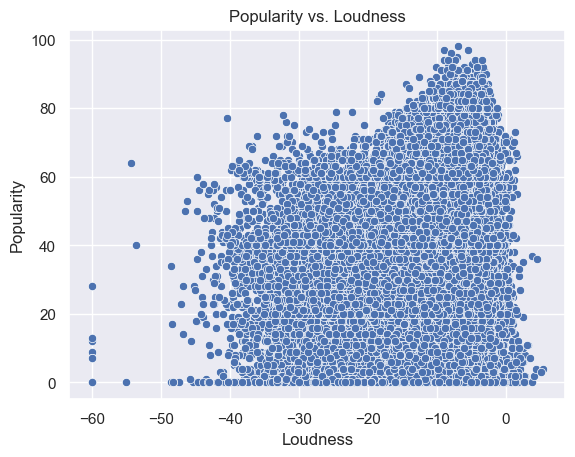

Correlation coefficient: 0.32738118303080893


In [67]:
#Next, let us see if there is a direct relationship between loudness and popularity through a scatter plot

# Create a scatter plot of loudness vs. popularity
sns.scatterplot(x='loudness', y='popularity', data=df)

# Set the plot title and axis labels
plt.title('Popularity vs. Loudness')
plt.xlabel('Loudness')
plt.ylabel('Popularity')

# Show the plot
plt.show()


# Calculate the correlation coefficient between loudness and popularity
corr = df['loudness'].corr(df['popularity'])

# Print the correlation coefficient to the console
print('Correlation coefficient:', corr)

A correlation coefficient of 0.327 between popularity and loudness suggests that there is a positive correlation between these two variables. This means that as the loudness of a song increases, the popularity of the song tends to increase as well. However, the correlation coefficient of 0.327 is not very strong, so the relationship between these two variables may not be very significant.

## Mode and Popularity

Since mode is a binary (1 or 0) we will group the songs by their mode and analyse the popularity distribution based on that

Mode 0:
Number of data points: 159947
Mean popularity: 28.44459727284663
Median popularity: 28.0
Mode 1:
Number of data points: 309389
Mean popularity: 27.12582541719324
Median popularity: 27.0


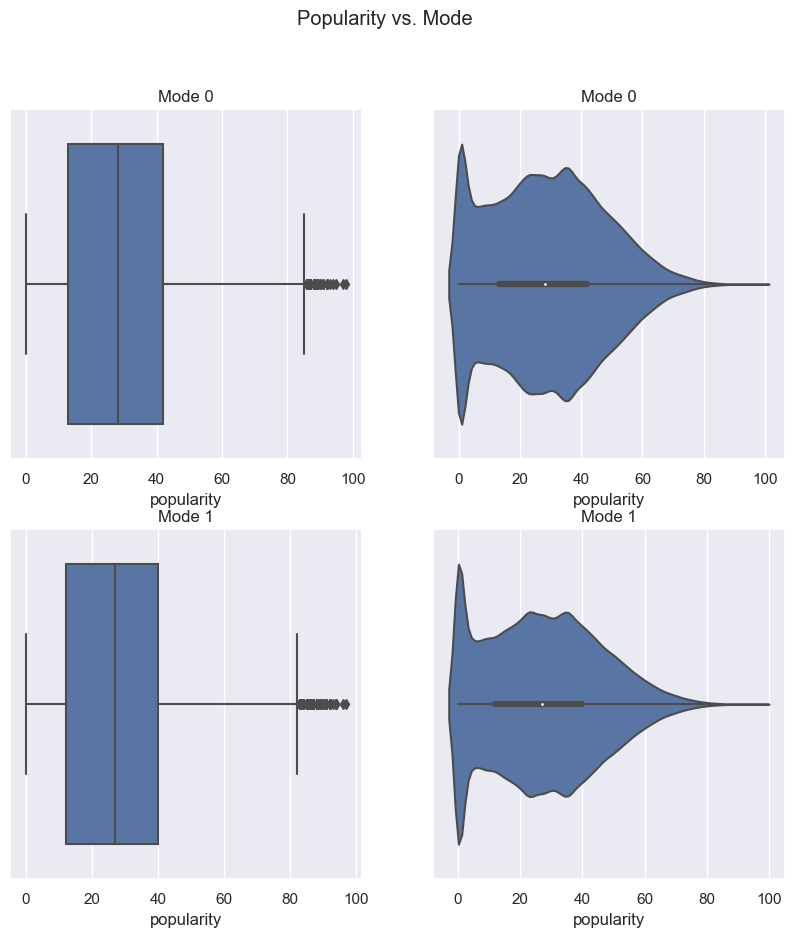

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('../Data/tracks_reduced.csv')

# Split the DataFrame by mode
mode0 = df[df['mode'] == 0]['popularity']
mode1 = df[df['mode'] == 1]['popularity']

print("Mode 0:")
print("Number of data points:", len(mode0))
print("Mean popularity:", mode0.mean())
print("Median popularity:", mode0.median())

print("Mode 1:")
print("Number of data points:", len(mode1))
print("Mean popularity:", mode1.mean())
print("Median popularity:", mode1.median())

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Create a boxplot of popularity for mode 0 in the first subplot
sns.boxplot(x=mode0, ax=axs[0, 0])
axs[0, 0].set_title('Mode 0')

# Create a violin plot of popularity for mode 0 in the second subplot
sns.violinplot(x=mode0, ax=axs[0, 1])
axs[0, 1].set_title('Mode 0')

# Create a boxplot of popularity for mode 1 in the third subplot
sns.boxplot(x=mode1, ax=axs[1, 0])
axs[1, 0].set_title('Mode 1')

# Create a violin plot of popularity for mode 1 in the fourth subplot
sns.violinplot(x=mode1, ax=axs[1, 1])
axs[1, 1].set_title('Mode 1')


# Set the overall title of the figure
fig.suptitle('Popularity vs. Mode')

# Show the plot
plt.show()




The plots and popularity distirbtuion for both modes look very similar. Similarly, median and mean popularity for both modes are close to each other. This suggests that mode does not affect popularity

## Speechiness and Popularity

Speechiness Statistics:

mean      0.105
median    0.044
25%       0.034
75%       0.076
std       0.180
Name: speechiness, dtype: object


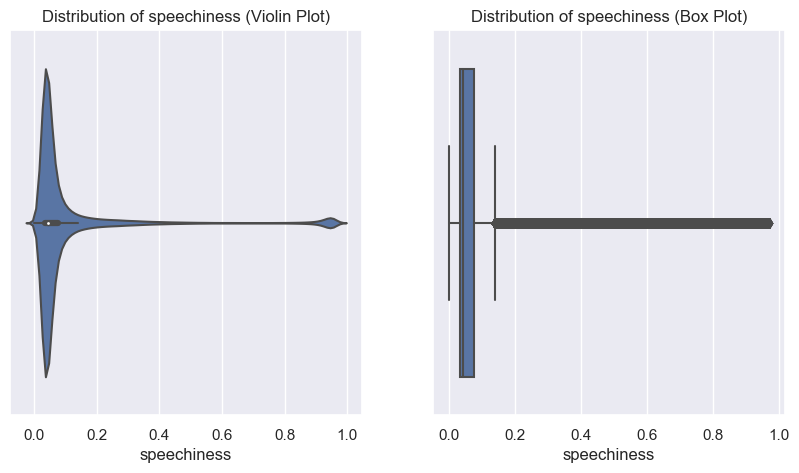

In [69]:
df = pd.read_csv('../Data/tracks_reduced.csv')

# Calculate the mean, median, quartiles, and variance of speechiness
speechiness_stats = df['speechiness'].describe()[['mean', '50%', '25%', '75%', 'std']]
speechiness_stats.rename(index={'50%': 'median'}, inplace=True)

# Convert the statistics to string with 3 decimal places
speechiness_stats = speechiness_stats.apply(lambda x: f'{x:.3f}')

print('Speechiness Statistics:\n')
print(speechiness_stats)

# Create a violin plot and box plot of speechiness
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.violinplot(x=df['speechiness'], ax=axes[0])
axes[0].set_title('Distribution of speechiness (Violin Plot)')
axes[0].set_xlabel('speechiness')

sns.boxplot(x=df['speechiness'], ax=axes[1])
axes[1].set_title('Distribution of speechiness (Box Plot)')
axes[1].set_xlabel('speechiness')

plt.show()

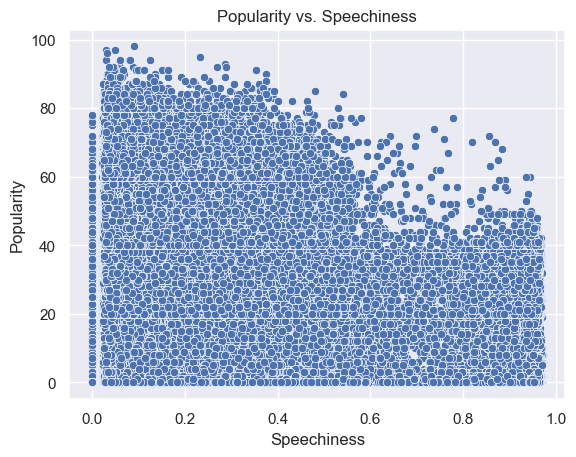

Correlation coefficient: -0.0476252160430723


In [70]:
#Next, let us see if there is a direct relationship between speechiness and popularity through a scatter plot

# Create a scatter plot of speechiness vs. popularity
sns.scatterplot(x='speechiness', y='popularity', data=df)

# Set the plot title and axis labels
plt.title('Popularity vs. Speechiness')
plt.xlabel('Speechiness')
plt.ylabel('Popularity')

# Show the plot
plt.show()


# Calculate the correlation coefficient between Speechiness and popularity
corr = df['speechiness'].corr(df['popularity'])

# Print the correlation coefficient to the console
print('Correlation coefficient:', corr)

A correlation coefficient of -0.0476 suggests a weak negative correlation between speechiness and popularity. A negative correlation indicates that as the speechiness of a track increases, there tends to be a slight decrease in popularity, but this relationship is very weak.

## Acousticness and Popularity

Acousticness Statistics:

mean      0.449
median    0.422
25%       0.097
75%       0.784
std       0.349
Name: acousticness, dtype: object


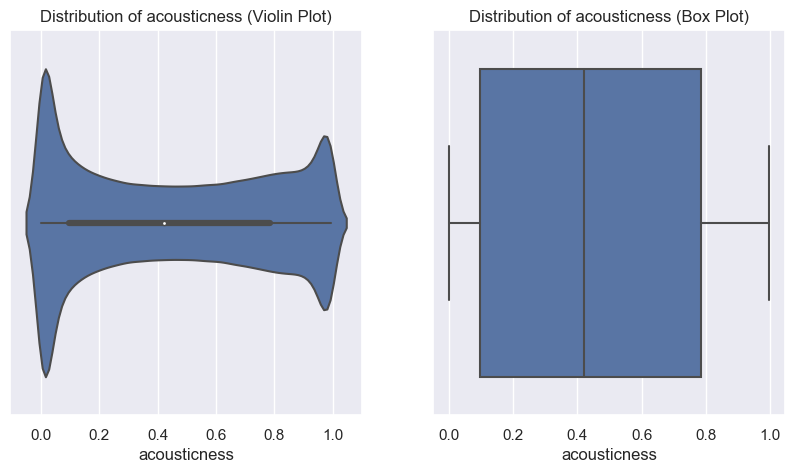

In [71]:
df = pd.read_csv('../Data/tracks_reduced.csv')

# Calculate the mean, median, quartiles, and variance of acousticness
acousticness_stats = df['acousticness'].describe()[['mean', '50%', '25%', '75%', 'std']]
acousticness_stats.rename(index={'50%': 'median'}, inplace=True)

# Convert the statistics to string with 3 decimal places
acousticness_stats = acousticness_stats.apply(lambda x: f'{x:.3f}')

print('Acousticness Statistics:\n')
print(acousticness_stats)

# Create a violin plot and box plot of acousticness
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.violinplot(x=df['acousticness'], ax=axes[0])
axes[0].set_title('Distribution of acousticness (Violin Plot)')
axes[0].set_xlabel('acousticness')

sns.boxplot(x=df['acousticness'], ax=axes[1])
axes[1].set_title('Distribution of acousticness (Box Plot)')
axes[1].set_xlabel('acousticness')

plt.show()

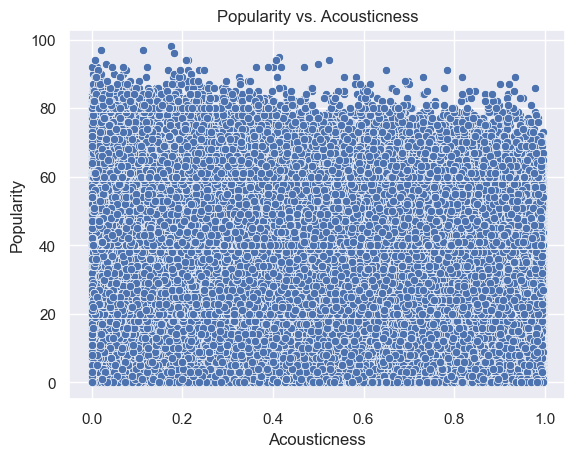

Correlation coefficient: -0.37092325077063615


In [72]:
#Next, let us see if there is a direct relationship between acousticness and popularity through a scatter plot

# Create a scatter plot of acousticness vs. popularity
sns.scatterplot(x='acousticness', y='popularity', data=df)

# Set the plot title and axis labels
plt.title('Popularity vs. Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Popularity')

# Show the plot
plt.show()


# Calculate the correlation coefficient between acousticness and popularity
corr = df['acousticness'].corr(df['popularity'])

# Print the correlation coefficient to the console
print('Correlation coefficient:', corr)

A correlation coefficient of -0.371 indicates a moderate negative correlation between popularity and acousticness in the dataset being analyzed.

This suggests that as the acousticness of a track increases, there tends to be a decrease in popularity, although the relationship is not very strong.

## Instrumentalness and Popularity

Instrumentalness Statistics:

mean      0.113
median    0.000
25%       0.000
75%       0.009
std       0.267
Name: instrumentalness, dtype: object


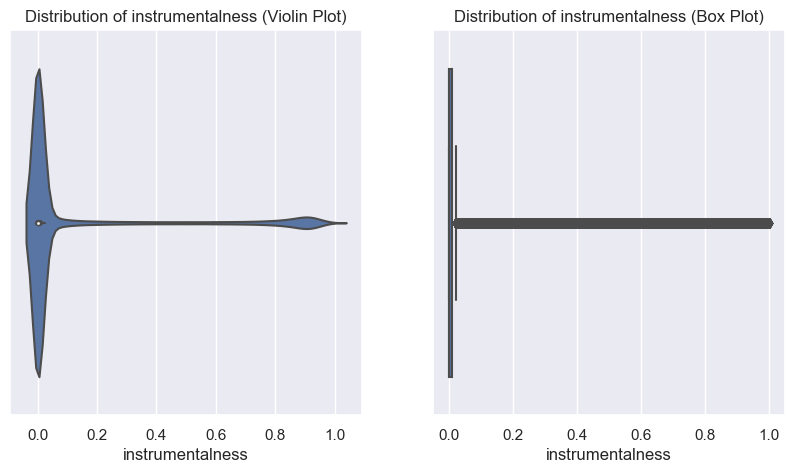

In [73]:
df = pd.read_csv('../Data/tracks_reduced.csv')

# Calculate the mean, median, quartiles, and variance of instrumentalness
instrumentalness_stats = df['instrumentalness'].describe()[['mean', '50%', '25%', '75%', 'std']]
instrumentalness_stats.rename(index={'50%': 'median'}, inplace=True)

# Convert the statistics to string with 3 decimal places
instrumentalness_stats = instrumentalness_stats.apply(lambda x: f'{x:.3f}')

print('Instrumentalness Statistics:\n')
print(instrumentalness_stats)

# Create a violin plot and box plot of instrumentalness
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.violinplot(x=df['instrumentalness'], ax=axes[0])
axes[0].set_title('Distribution of instrumentalness (Violin Plot)')
axes[0].set_xlabel('instrumentalness')

sns.boxplot(x=df['instrumentalness'], ax=axes[1])
axes[1].set_title('Distribution of instrumentalness (Box Plot)')
axes[1].set_xlabel('instrumentalness')

plt.show()

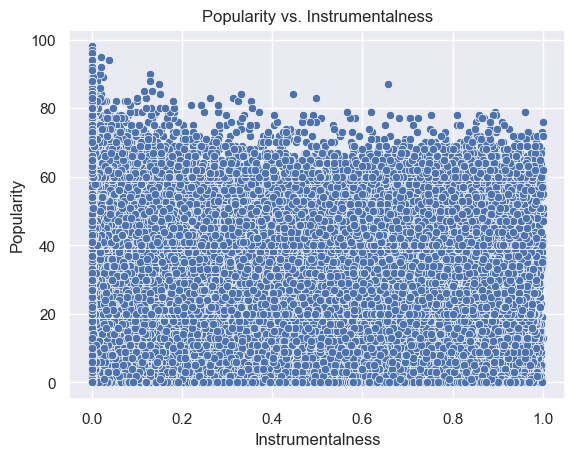

Correlation coefficient: -0.2363725670502624


In [74]:
#Next, let us see if there is a direct relationship between instrumentalness and popularity through a scatter plot

# Create a scatter plot of instrumentalness vs. popularity
sns.scatterplot(x='instrumentalness', y='popularity', data=df)

# Set the plot title and axis labels
plt.title('Popularity vs. Instrumentalness')
plt.xlabel('Instrumentalness')
plt.ylabel('Popularity')

# Show the plot
plt.show()


# Calculate the correlation coefficient between instrumentalness and popularity
corr = df['instrumentalness'].corr(df['popularity'])

# Print the correlation coefficient to the console
print('Correlation coefficient:', corr)

A correlation coefficient of -0.236 suggests a weak negative correlation between popularity and instrumentalness. This indicates that as the instrumentalness of a track increases, there tends to be a slight decrease in popularity, but the relationship is not very strong.

## Liveness and Popularity

Liveness Statistics:

mean      0.214
median    0.139
25%       0.098
75%       0.278
std       0.184
Name: liveness, dtype: object


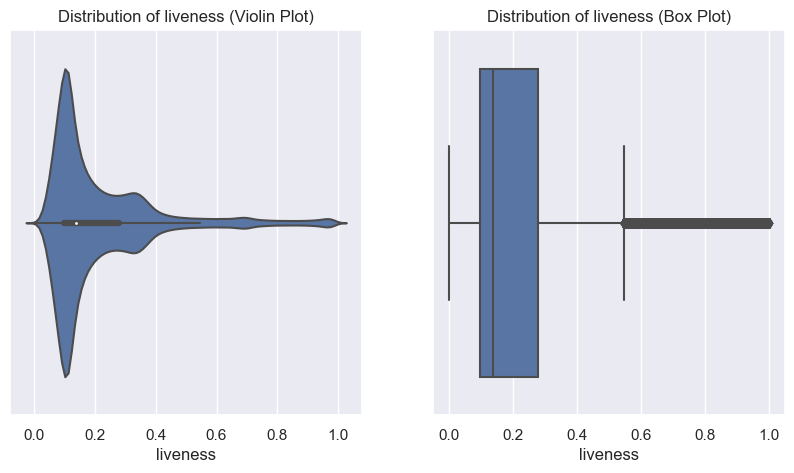

In [75]:
df = pd.read_csv('../Data/tracks_reduced.csv')

# Calculate the mean, median, quartiles, and variance of liveness
liveness_stats = df['liveness'].describe()[['mean', '50%', '25%', '75%', 'std']]
liveness_stats.rename(index={'50%': 'median'}, inplace=True)

# Convert the statistics to string with 3 decimal places
liveness_stats = liveness_stats.apply(lambda x: f'{x:.3f}')

print('Liveness Statistics:\n')
print(liveness_stats)

# Create a violin plot and box plot of liveness
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.violinplot(x=df['liveness'], ax=axes[0])
axes[0].set_title('Distribution of liveness (Violin Plot)')
axes[0].set_xlabel('liveness')

sns.boxplot(x=df['liveness'], ax=axes[1])
axes[1].set_title('Distribution of liveness (Box Plot)')
axes[1].set_xlabel('liveness')

plt.show()

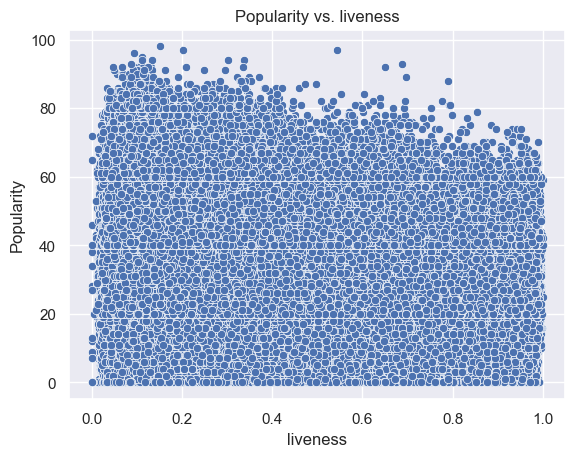

Correlation coefficient: -0.049358987181780944


In [76]:
#Next, let us see if there is a direct relationship between liveness and popularity through a scatter plot

# Create a scatter plot of liveness vs. popularity
sns.scatterplot(x='liveness', y='popularity', data=df)

# Set the plot title and axis labels
plt.title('Popularity vs. liveness')
plt.xlabel('liveness')
plt.ylabel('Popularity')

# Show the plot
plt.show()


# Calculate the correlation coefficient between liveness and popularity
corr = df['liveness'].corr(df['popularity'])

# Print the correlation coefficient to the console
print('Correlation coefficient:', corr)

A correlation coefficient of -0.0494 indicates a weak negative correlation between popularity and liveness. This suggests that as the liveness of a track increases, there tends to be a slight decrease in popularity, but the relationship is very weak.

## Valence and Popularity

Valence Statistics:

mean      0.214
median    0.139
25%       0.098
75%       0.278
std       0.184
Name: liveness, dtype: object


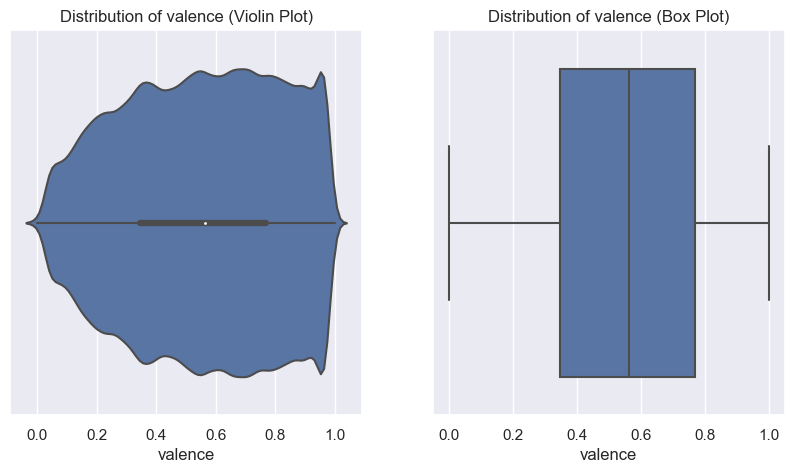

In [77]:
df = pd.read_csv('../Data/tracks_reduced.csv')

# Calculate the mean, median, quartiles, and variance of valence
valence_stats = df['liveness'].describe()[['mean', '50%', '25%', '75%', 'std']]
valence_stats.rename(index={'50%': 'median'}, inplace=True)

# Convert the statistics to string with 3 decimal places
valence_stats = valence_stats.apply(lambda x: f'{x:.3f}')

print('Valence Statistics:\n')
print(valence_stats)

# Create a violin plot and box plot of valence
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.violinplot(x=df['valence'], ax=axes[0])
axes[0].set_title('Distribution of valence (Violin Plot)')
axes[0].set_xlabel('valence')

sns.boxplot(x=df['valence'], ax=axes[1])
axes[1].set_title('Distribution of valence (Box Plot)')
axes[1].set_xlabel('valence')

plt.show()

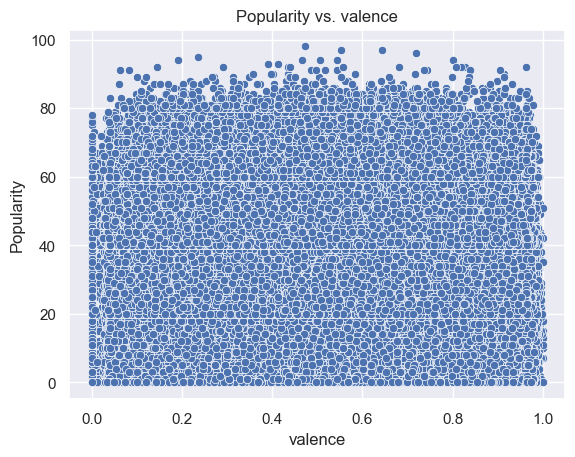

Correlation coefficient: 0.005430100822048294


In [78]:
#Next, let us see if there is a direct relationship between valence and popularity through a scatter plot

# Create a scatter plot of valence vs. popularity
sns.scatterplot(x='valence', y='popularity', data=df)

# Set the plot title and axis labels
plt.title('Popularity vs. valence')
plt.xlabel('valence')
plt.ylabel('Popularity')

# Show the plot
plt.show()


# Calculate the correlation coefficient between valence and popularity
corr = df['valence'].corr(df['popularity'])

# Print the correlation coefficient to the console
print('Correlation coefficient:', corr)

A correlation coefficient of 0.00543 indicates a very weak positive correlation between valence and popularity.

This suggests that there is almost no relationship between valence and popularity, and any correlation that does exist is too weak to be practically significant. 

## Tempo and Popularity

Tempo Statistics:

mean      0.214
median    0.139
25%       0.098
75%       0.278
std       0.184
Name: liveness, dtype: object


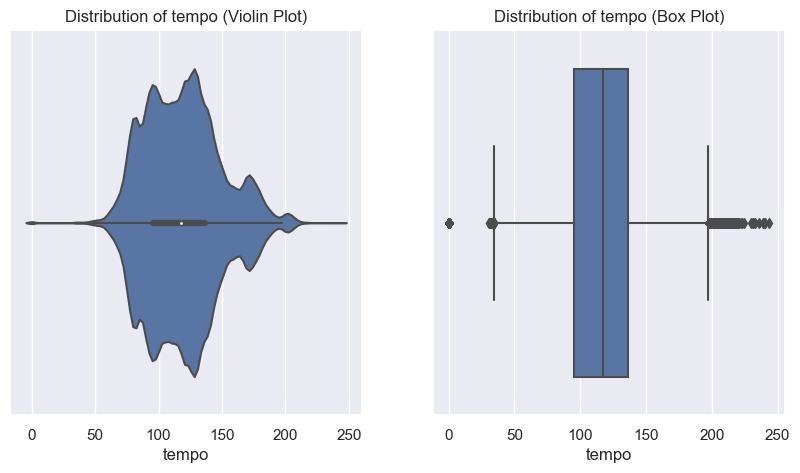

In [79]:
df = pd.read_csv('../Data/tracks_reduced.csv')

# Calculate the mean, median, quartiles, and variance of tempo
tempo_stats = df['liveness'].describe()[['mean', '50%', '25%', '75%', 'std']]
tempo_stats.rename(index={'50%': 'median'}, inplace=True)

# Convert the statistics to string with 3 decimal places
tempo_stats = tempo_stats.apply(lambda x: f'{x:.3f}')

print('Tempo Statistics:\n')
print(tempo_stats)

# Create a violin plot and box plot of tempo
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.violinplot(x=df['tempo'], ax=axes[0])
axes[0].set_title('Distribution of tempo (Violin Plot)')
axes[0].set_xlabel('tempo')

sns.boxplot(x=df['tempo'], ax=axes[1])
axes[1].set_title('Distribution of tempo (Box Plot)')
axes[1].set_xlabel('tempo')

plt.show()

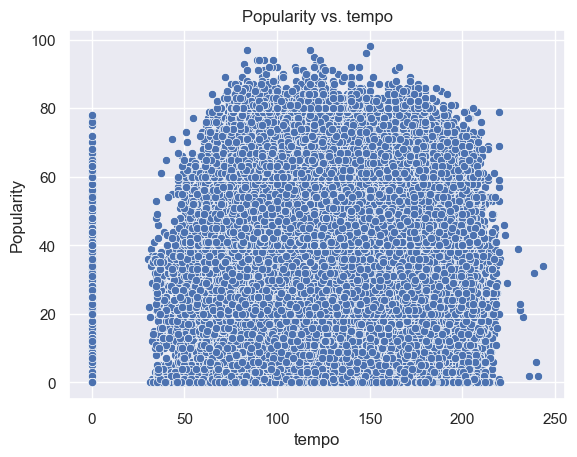

Correlation coefficient: 0.0713725328103051


In [80]:
#Next, let us see if there is a direct relationship between tempo and popularity through a scatter plot

# Create a scatter plot of tempo vs. popularity
sns.scatterplot(x='tempo', y='popularity', data=df)

# Set the plot title and axis labels
plt.title('Popularity vs. tempo')
plt.xlabel('tempo')
plt.ylabel('Popularity')

# Show the plot
plt.show()


# Calculate the correlation coefficient between valence and popularity
corr = df['tempo'].corr(df['popularity'])

# Print the correlation coefficient to the console
print('Correlation coefficient:', corr)

A correlation coefficient of 0.0714 suggests a very weak positive correlation between popularity and tempo in the dataset. This indicates that there is a very slight tendency for tracks with a higher tempo to be slightly more popular, but the relationship is not practically significant.

## Time Signature and Popularity

Time_signature Statistics:

mean      0.214
median    0.139
25%       0.098
75%       0.278
std       0.184
Name: liveness, dtype: object


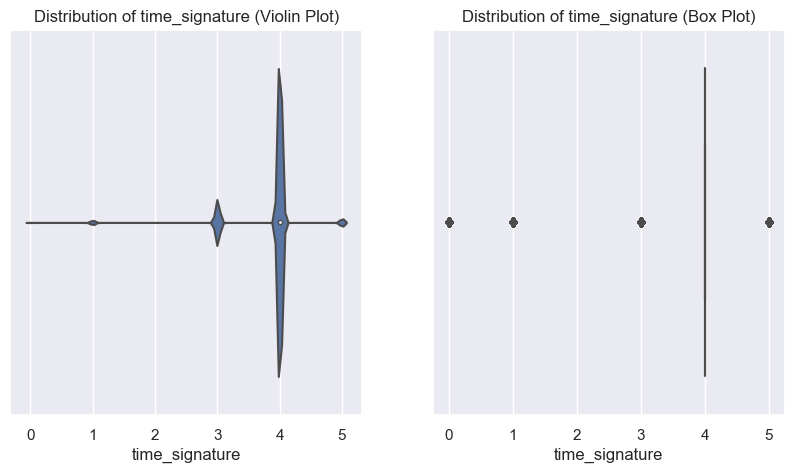

In [81]:
df = pd.read_csv('../Data/tracks_reduced.csv')

# Calculate the mean, median, quartiles, and variance of time_signature
time_signature_stats = df['liveness'].describe()[['mean', '50%', '25%', '75%', 'std']]
time_signature_stats.rename(index={'50%': 'median'}, inplace=True)

# Convert the statistics to string with 3 decimal places
time_signature_stats = time_signature_stats.apply(lambda x: f'{x:.3f}')

print('Time_signature Statistics:\n')
print(time_signature_stats)

# Create a violin plot and box plot of time_signature
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.violinplot(x=df['time_signature'], ax=axes[0])
axes[0].set_title('Distribution of time_signature (Violin Plot)')
axes[0].set_xlabel('time_signature')

sns.boxplot(x=df['time_signature'], ax=axes[1])
axes[1].set_title('Distribution of time_signature (Box Plot)')
axes[1].set_xlabel('time_signature')

plt.show()

Number of data points in each time_signature:
4    403248
3     51460
5      9054
1      5317
0       257
Name: time_signature, dtype: int64
Correlation coefficient: 0.08712509129747129


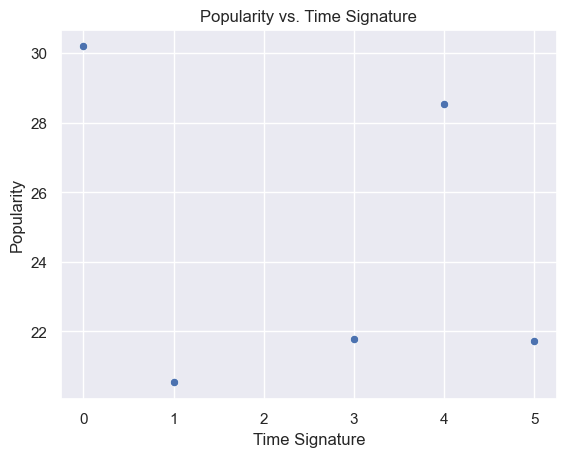

In [82]:
# Count the number of data points in each time_signature
data_points_by_time_signature = df['time_signature'].value_counts()

# Print the number of data points in each time_signature
print('Number of data points in each time_signature:')
print(data_points_by_time_signature)

# Calculate the mean popularity for each time_signature
popularity_by_time_signature = df.groupby('time_signature')['popularity'].mean()

# Create a scatter plot of popularity vs. time_signature
sns.scatterplot(x=popularity_by_time_signature.index, y=popularity_by_time_signature.values)
plt.title('Popularity vs. Time Signature')
plt.xlabel('Time Signature')
plt.ylabel('Popularity')


# Calculate the correlation coefficient between popularity and time_signature
corr = df['popularity'].corr(df['time_signature'])

# Print the correlation coefficient to the console
print('Correlation coefficient:', corr)


plt.show()



A correlation coefficient of 0.0871 between popularity and time signature suggests a weak positive relationship between these two variables. However, the strength of this relationship is quite low, which means that the time signature may not be a strong predictor of popularity in the music industry.

## Analysis

Based on the above analsyis, we have classified these factors into two categories in terms of their importance in determining popularity: Non-negligible and negligible.

Non-negligible factors are factors with a correlation coefficient of at least 0.15 or factors where a considerable amount of change in popularity is seen when the value of the factor is changed. Below is our classification:

Non-negligible Factors:
1. Duration - Duration in cluster 4 tends to have a relatively higher popularity.
2. Explicit - Songs which are explicit generally have a higher mean and median. The popularity difference between explicit and non explicit songs is significant.
3. Release Year - Mean popularity had a clear increase in the line graph.
4. Release Month - While most months had similar mean popularity, popularity in Dec and Jan was significantly lower and should be accounted for.
5. Danceability - A correlation coefficient of 0.186 with popularity. A weak positive relationship between the two variables but not negligible.
6. Energy - A correlation coefficient of 0.30 between popularity and energy is not strong but still not negligble.
7. Loudness - A correlation coefficient of 0.33 is not negligible.
8. Acousticness - A correlation coefficient of -0.3688880564492198 indicates a moderate negative correlation between popularity and acousticness.
9. Instrumentalness - A correlation coefficient of -0.2379638755244929 suggests a weak negative correlation between popularity and instrumentalness. It is not negligible.

Negligble Factors:
1. Number of Artists - This factor has a relatively low correlation coeffcient with popularity.
2. Key - With a very low correlation coefficient of 0.015, key plays a negligible role in determining popularity.
3. Mode - The popularity distirbution, mean and median for both type of modes were similar suggesitng negligible importance.
4. Speechiness - A correlation coefficient of -0.04784065215902299 is negligible.
5. Liveness - A correlation coefficient of -0.04505514218760142 indicates a weak negligible correlation.
6. Valence - A correlation coefficient of 0.0097861529763494 indicates a very weak neglgible correlation between valence and popularity.
7. Tempo - A correlation coefficient of 0.07195897414968495 suggests a very weak neglgible correlation between popularity and tempo.
9. Time_Signature - A correlation coefficient of 0.08675881993137359 between popularity and time signature suggests a weak neglgible relationship.


## Extra Analysis

The heat map below is constructed to see how the various variables are related to each other.

<Axes: >

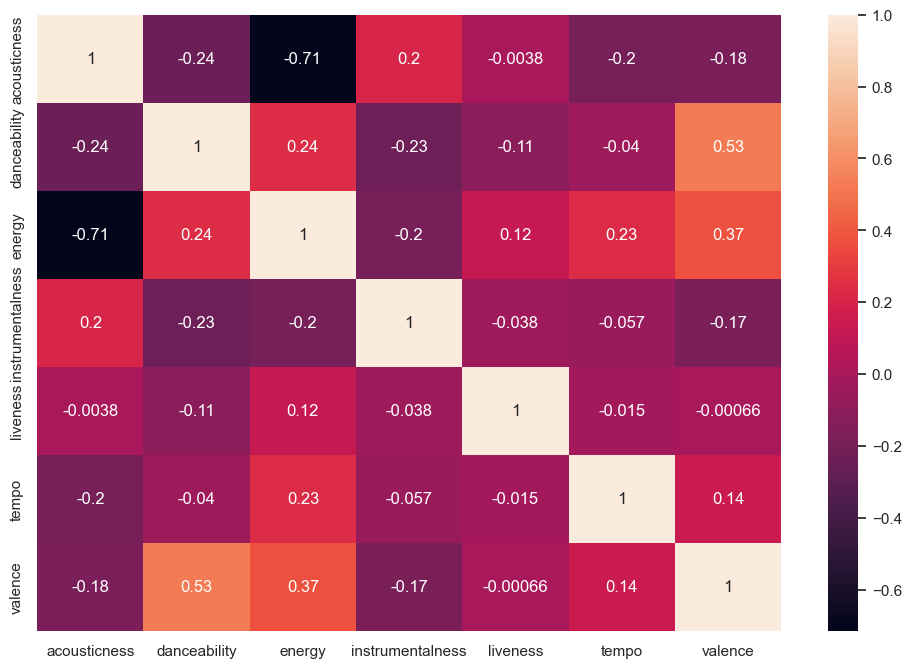

In [84]:
df = pd.read_csv('../Data/tracks_reduced.csv')
corr = df[['acousticness','danceability','energy',
'instrumentalness','liveness','tempo','valence']].corr()
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

A strong correlation coefficient of -0.71 between energy and acousticness suggests that if one is related to popularity, the other will be too. This is supported by our analysis earlier which shows that both have an absolute correlation coefficient of above 0.3 

## Further Analysis

Based on the above analysis, we have found factors that are related to popularity but often this relationship is not a strong one. Nonetheless, their weights in determining popularity cannot be ignored. Addtionally, a combination of factors may play a more vital role in determining popularity than just individual facors. As such, to account for both of this, we plan to do analysis based on Machine learning models.